# $$CLASSIFICATION --- PROJECT$$

## Objective - BUILD A MODEL TO DETERMINE THE GRADE OF HOUSES

#  

## Importing Required Libraries

In [102]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import ipywidgets
from ipywidgets import interact

# Reading the Data

In [2]:
House_df=pd.read_csv("C:/Users/Lenovo/Documents/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv")
House_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# Shape of Data 

In [3]:
House_df.shape

(3000, 14)

##### Data contains 3000 rows and 14 Features

# Information about data

In [4]:
categorical=[]
numerical=[]
for i in House_df:
    if House_df[i].nunique()<40:
        categorical.append(i)
    else:
        numerical.append(i)

In [5]:
print(tabulate({"Categorical":categorical,
                "continuous": numerical}, headers = ["categorical_Columns", "continuous_Columns"],tablefmt='grid'))

+-----------------------+----------------------+
| categorical_Columns   | continuous_Columns   |
+=======================+======================+
| Trooms                | Id                   |
+-----------------------+----------------------+
| Nbedrooms             | Area(total)          |
+-----------------------+----------------------+
| Nbwashrooms           | Roof(Area)           |
+-----------------------+----------------------+
| Twashrooms            | Lawn(Area)           |
+-----------------------+----------------------+
| roof                  | API                  |
+-----------------------+----------------------+
| Nfloors               | Expected price       |
+-----------------------+----------------------+
| ANB                   |                      |
+-----------------------+----------------------+
| Grade                 |                      |
+-----------------------+----------------------+


# Check for the null values

In [6]:
House_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

##### Data don't have any missing value

## $$\;\;\; Univariate \ Analysis $$

# Analysis of Categorical Features

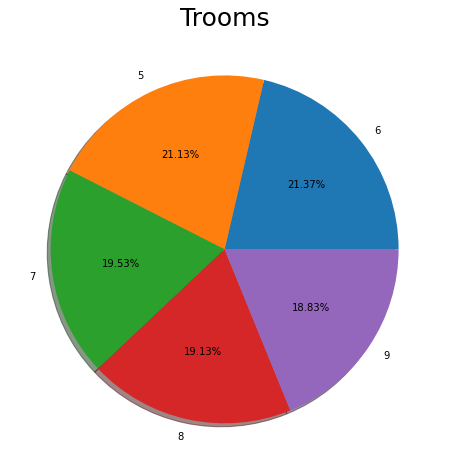

*****************************************************************************************************************************


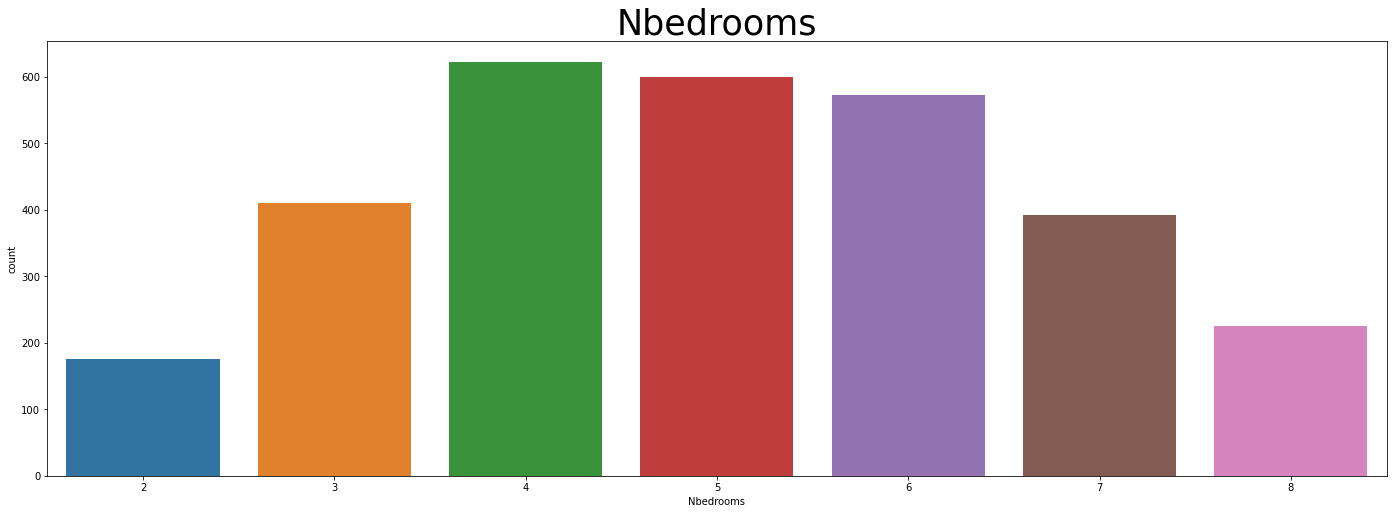

*****************************************************************************************************************************


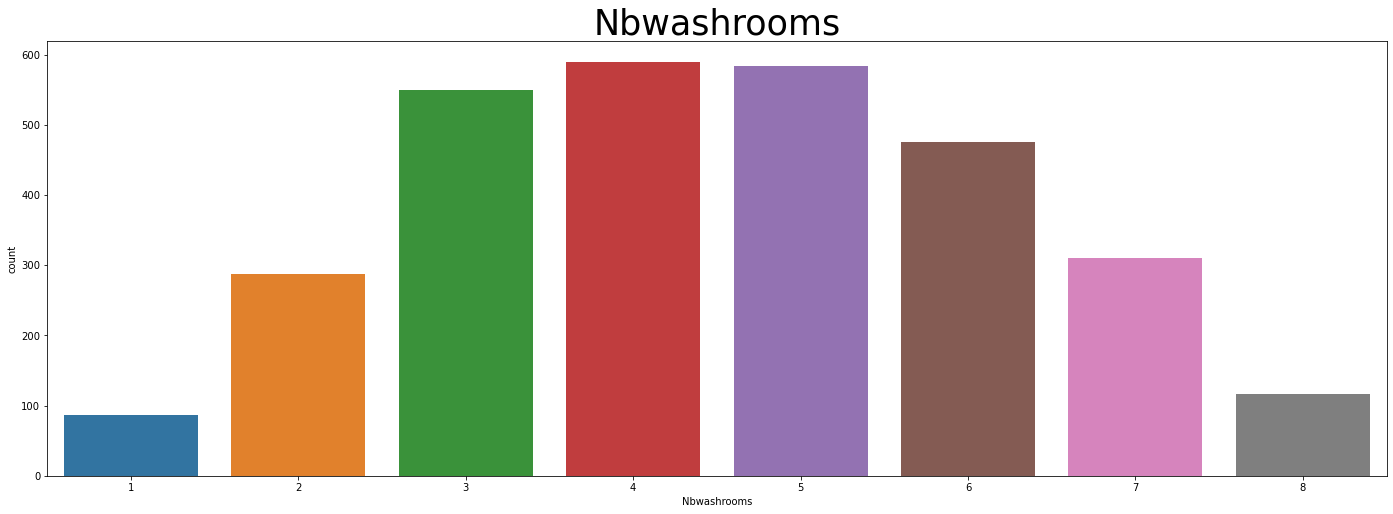

*****************************************************************************************************************************


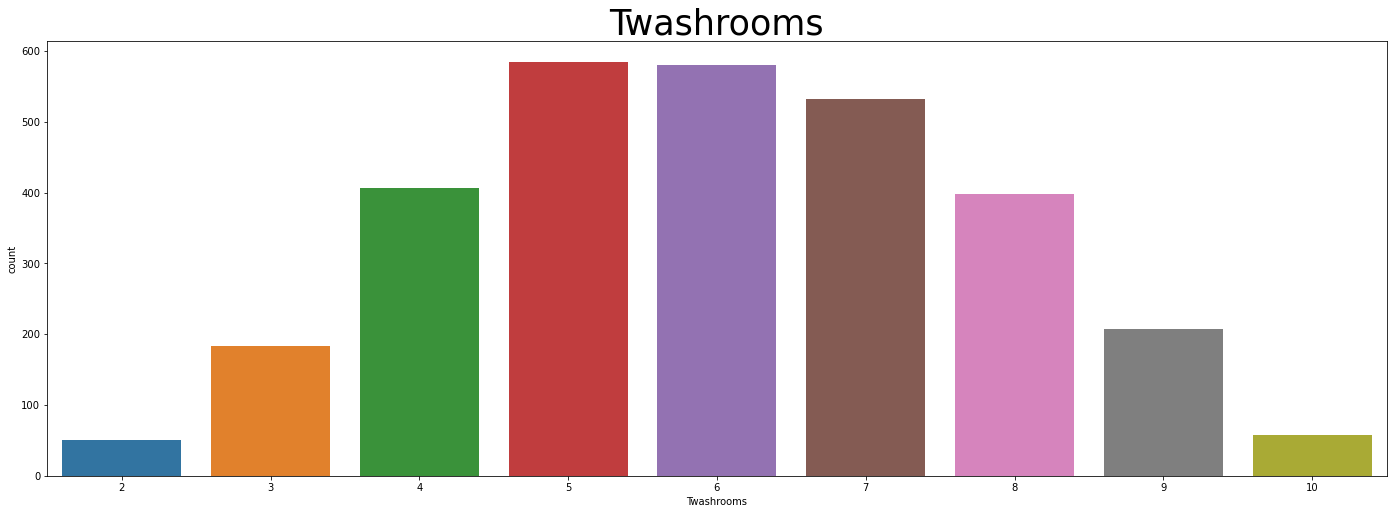

*****************************************************************************************************************************


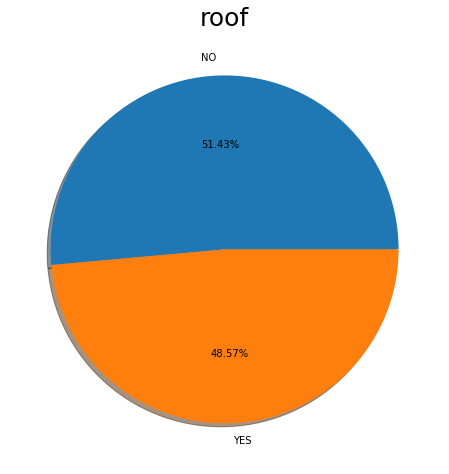

*****************************************************************************************************************************


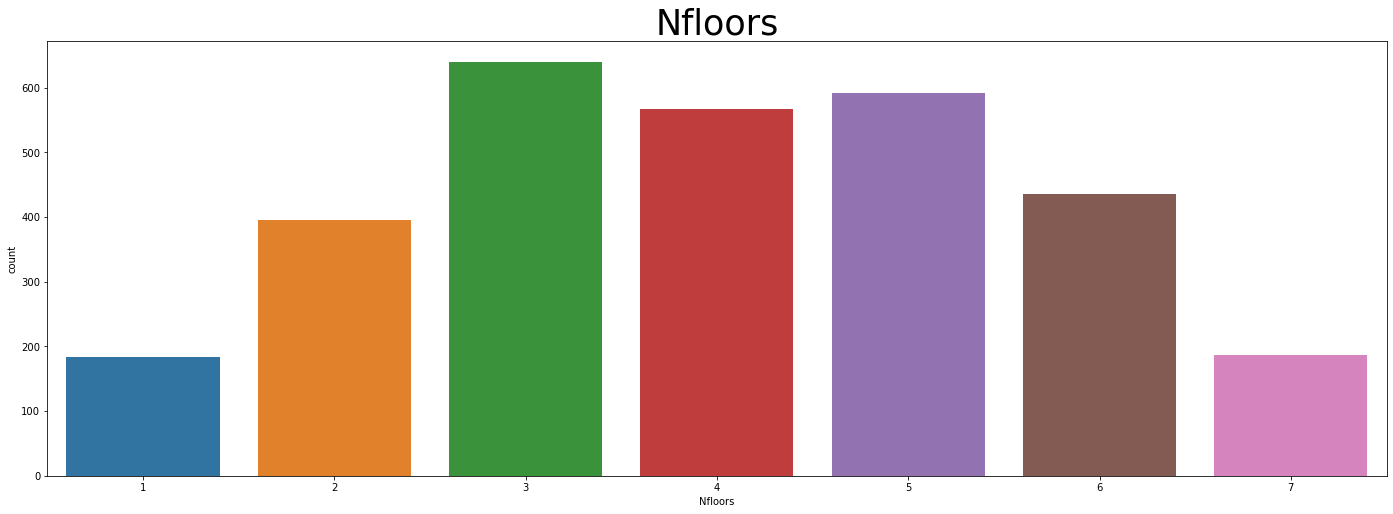

*****************************************************************************************************************************


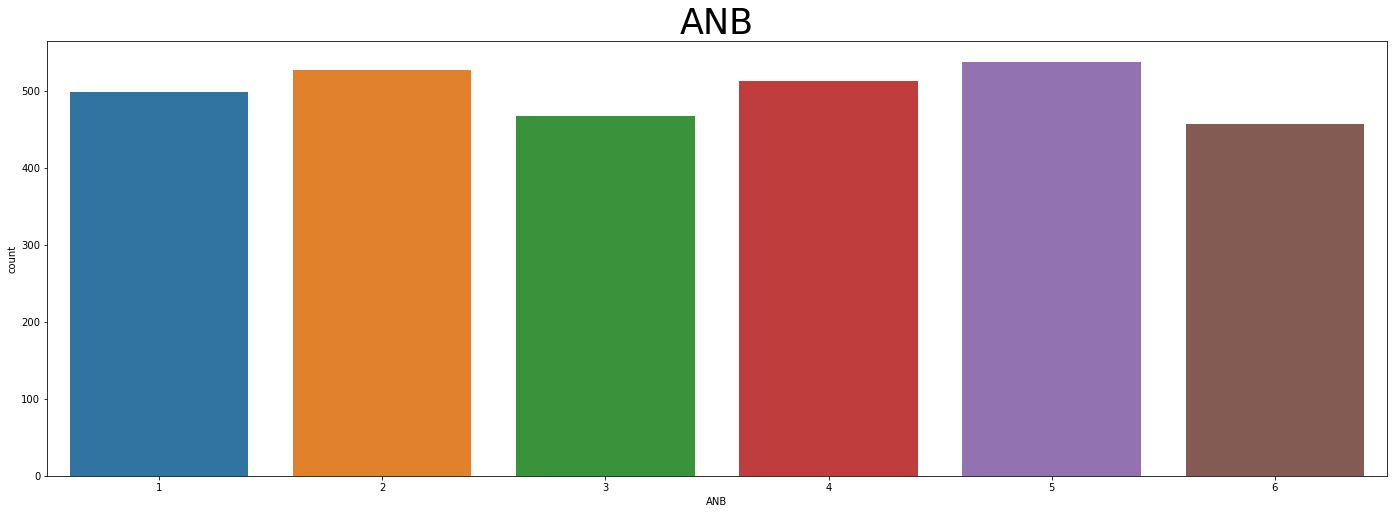

*****************************************************************************************************************************


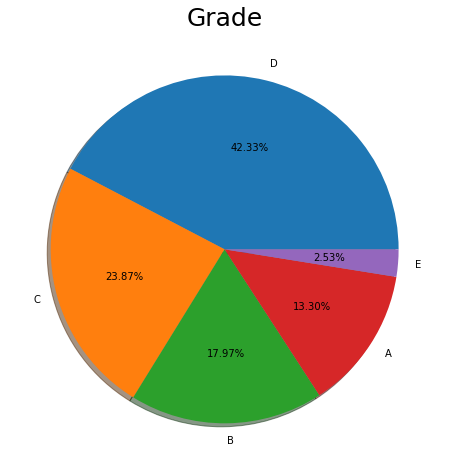

*****************************************************************************************************************************


In [7]:
for i in categorical:
    if House_df[i].nunique()<=5:
        plt.figure(figsize=(8,8))
        plt.pie(House_df[i].value_counts(),labels=House_df[i].unique(),autopct="%0.2f%%",shadow=True)
        plt.title(i,fontsize=25)
        plt.show()
        print('*****************************************************************************************************************************')
    else:
        plt.figure(figsize=(24,8))
        sns.countplot(House_df[i])
        plt.title(i,fontsize=35)
        plt.show()
        print('*****************************************************************************************************************************')

# $ Observations  $

##### 1. Most o the houses have 5 and 6 Rooms
##### 2. Most of the House have 4 bedrooms
##### 3. Most of the House have 4 number of Washrooms
##### 4. 51% Housed don't have roof
##### 5. Most of the Houses have 3 number of floors
##### 6. Majority of 42.33% Houses belongs to D Grade

##  

# Analysis of Numerical Features

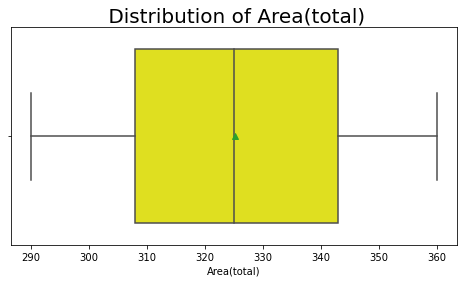

*****************************************************************************************************************************


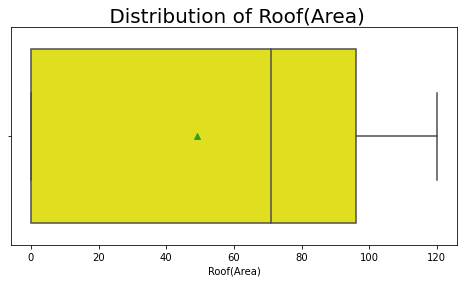

*****************************************************************************************************************************


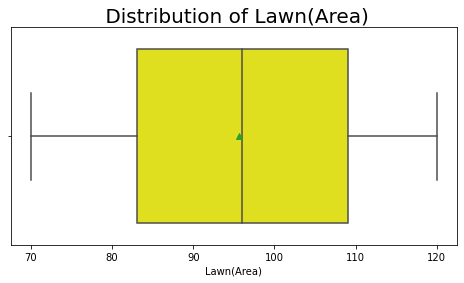

*****************************************************************************************************************************


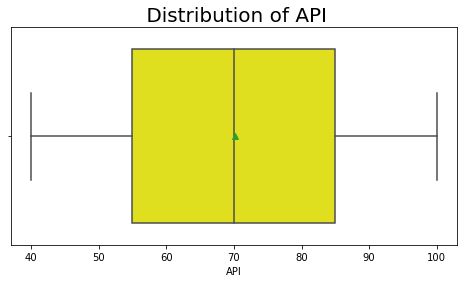

*****************************************************************************************************************************


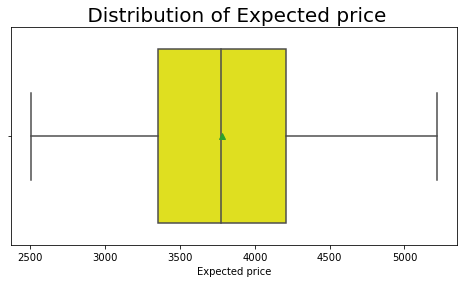

*****************************************************************************************************************************


In [8]:
for i in numerical:
    if i!='Id':
        plt.figure(figsize=(8,4))
        sns.boxplot(House_df[i],color='yellow',showmeans=True)
        plt.title(f' Distribution of {i}',fontsize=20)
        plt.show()
        print('*****************************************************************************************************************************')

# $ Observations $ 

### Area :

##### 1. Min area is around 290
##### 2. Max area is around 360
##### 3. Most of the area are between 310 to 345
##### 4. area distribution is Normally distributed

### Roof Area:

##### 1. Min area is around 0
##### 2. Max area is around 95
##### 3. Most of the area are between 0 to 90
##### 4. area distribution is left skewed

### Expected Price

##### 1. Min Price is around 2500
##### 2. Max Price is around 5500
##### 3. Most of the Price are between 3300 to 4200
##### 4. Price distribution is Normally distributed

## $$\;\;\; Bivariate \ Analysis $$

# Analysis of Categorical to Categorical Features

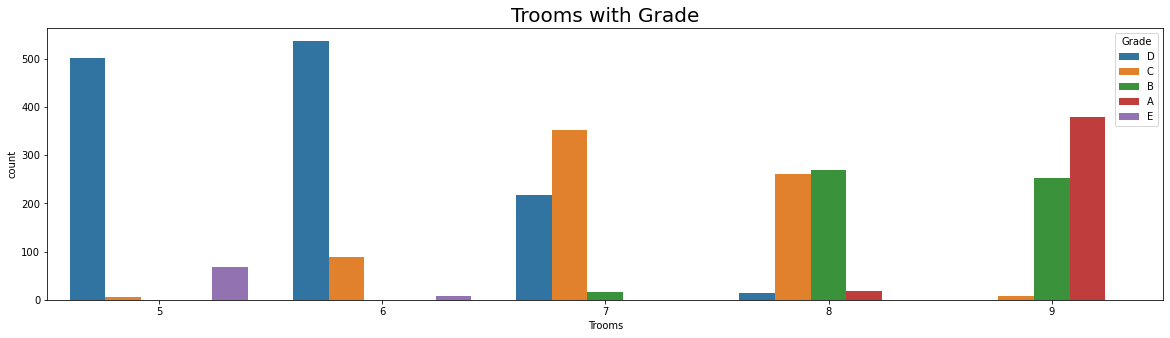

*****************************************************************************************************************************


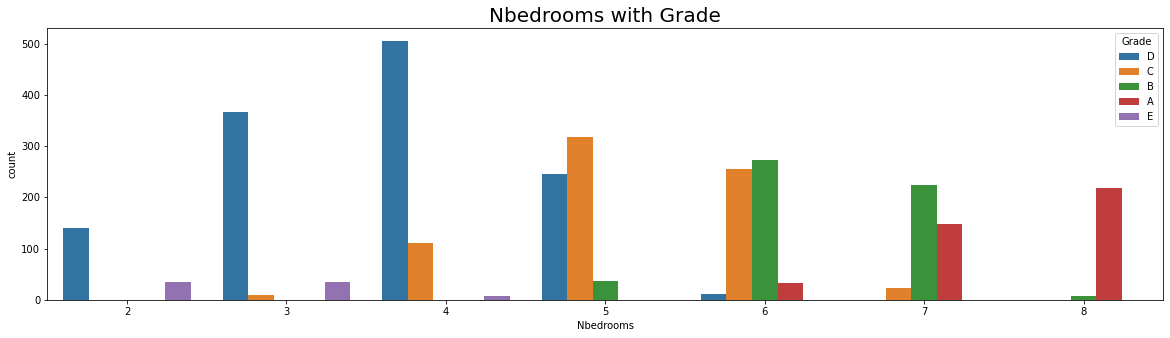

*****************************************************************************************************************************


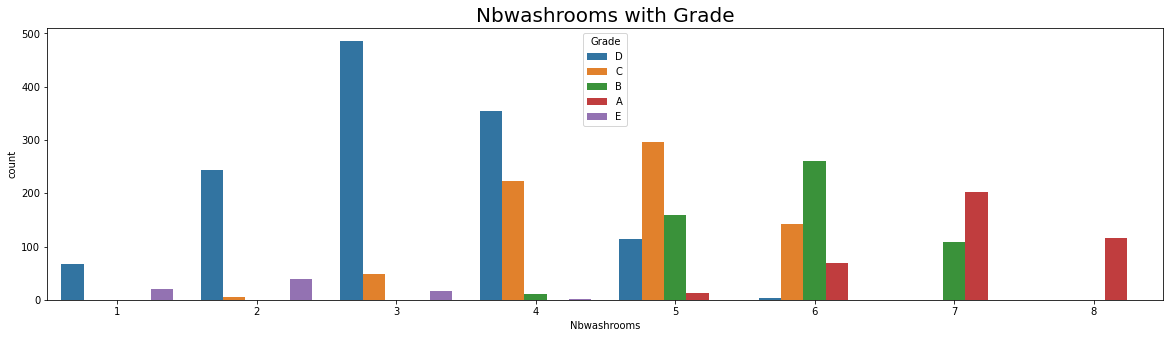

*****************************************************************************************************************************


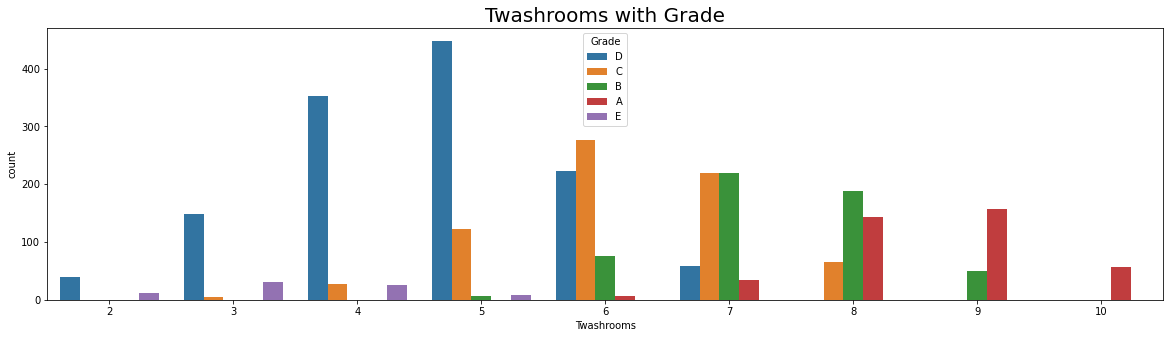

*****************************************************************************************************************************


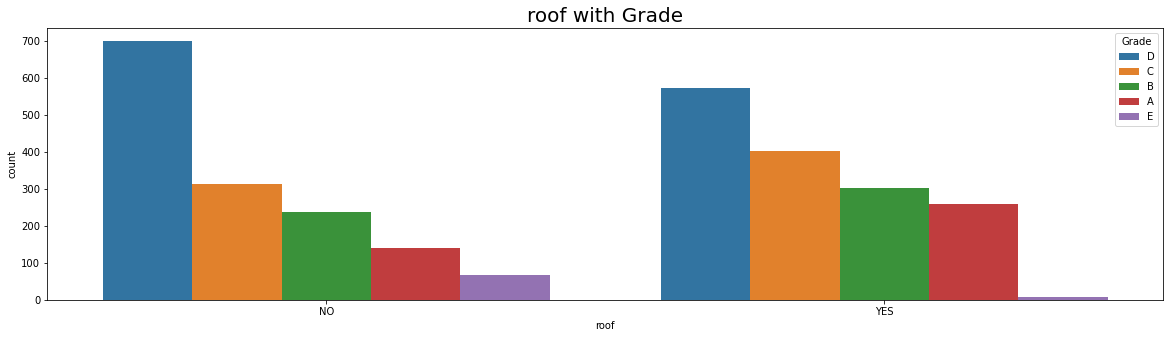

*****************************************************************************************************************************


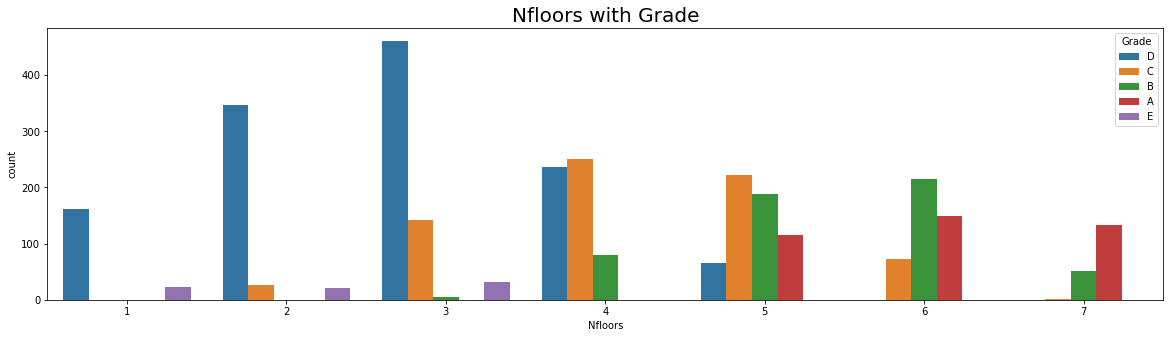

*****************************************************************************************************************************


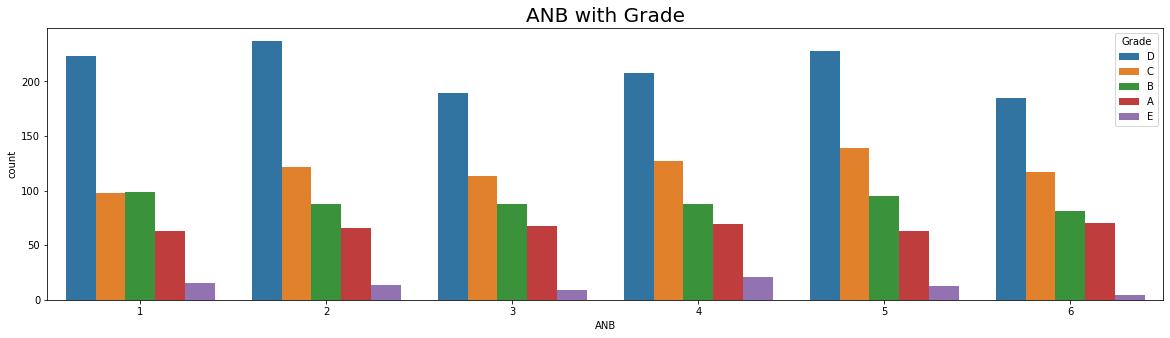

*****************************************************************************************************************************


In [9]:
for i in categorical:
    if i!='Grade':
        plt.figure(figsize=(20,5))
        sns.countplot(House_df[i],hue=House_df['Grade'])
        plt.title(f'{i} with Grade',fontsize=20)
        plt.show()
        print('*****************************************************************************************************************************')

## $ Observations $

##### 1.     5 ,6 Rooms have mojority of D grade and 7,8,9 Rooms have majority of C,B,A grade respectively .
##### 2.     2,3,4 Bedrooms have mojority of D grade and 5,6,7,8 Bedrooms have majority of C,B,B,A grade respectively
##### 3.     1,2,3,4 Washrooms have majority of D grade and 5,6,7,8 Washrooms have majority of C,B,A,A grade respectively
##### 4.    1,2,3 floors have majority of D grade and 4,5,6,7 flooors have majority of C,C,B,A grade respectively

#  

# Analysis of Categorical to Numerical Features

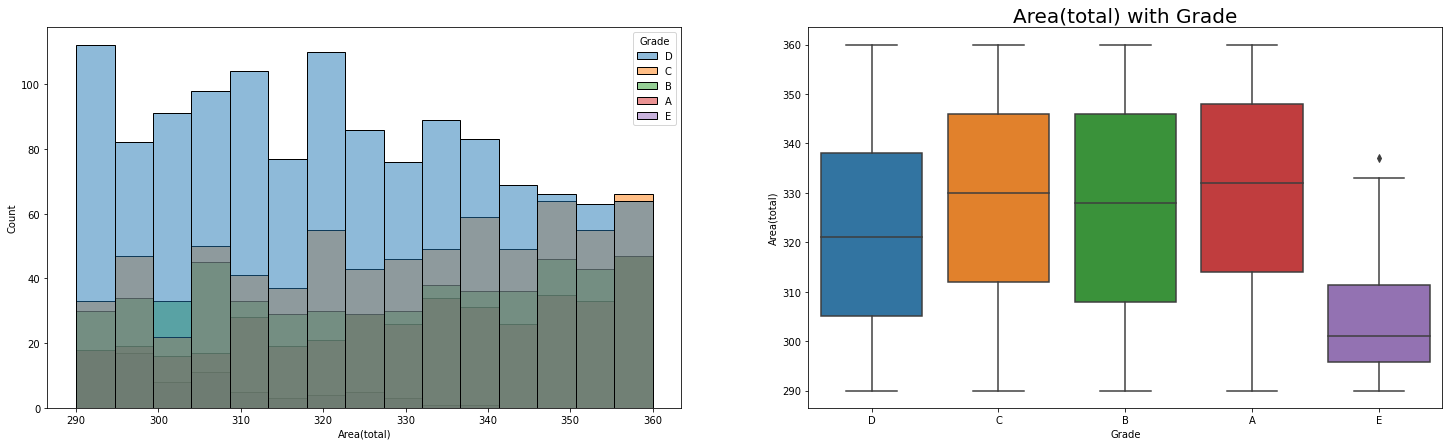

*****************************************************************************************************************************


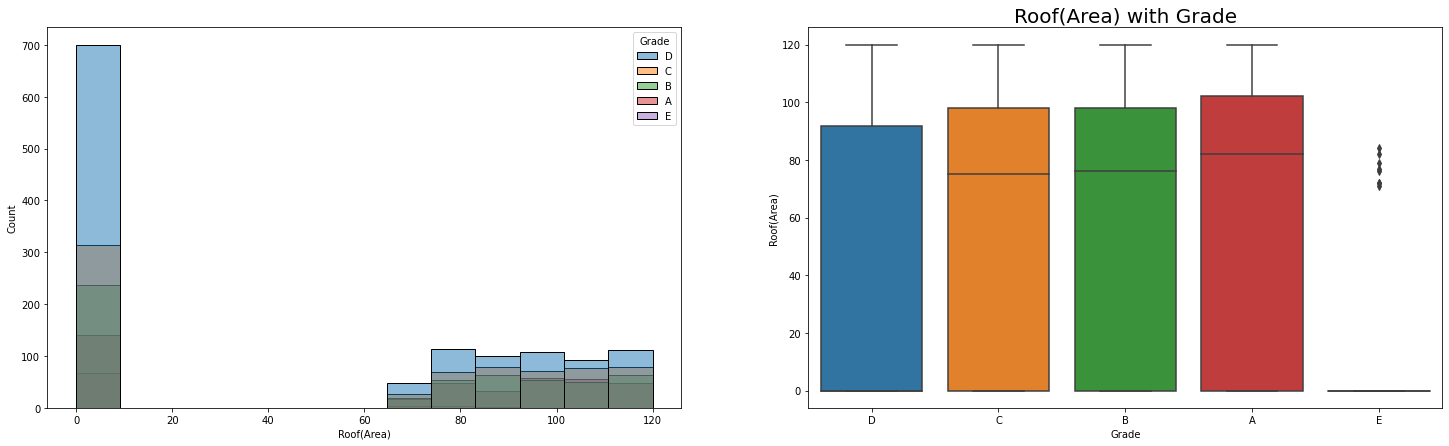

*****************************************************************************************************************************


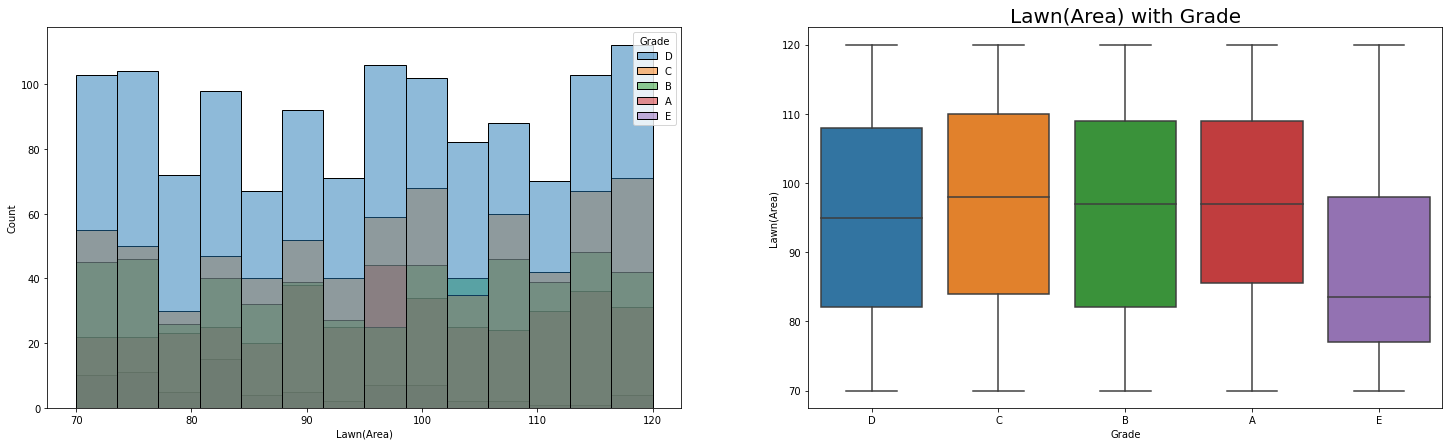

*****************************************************************************************************************************


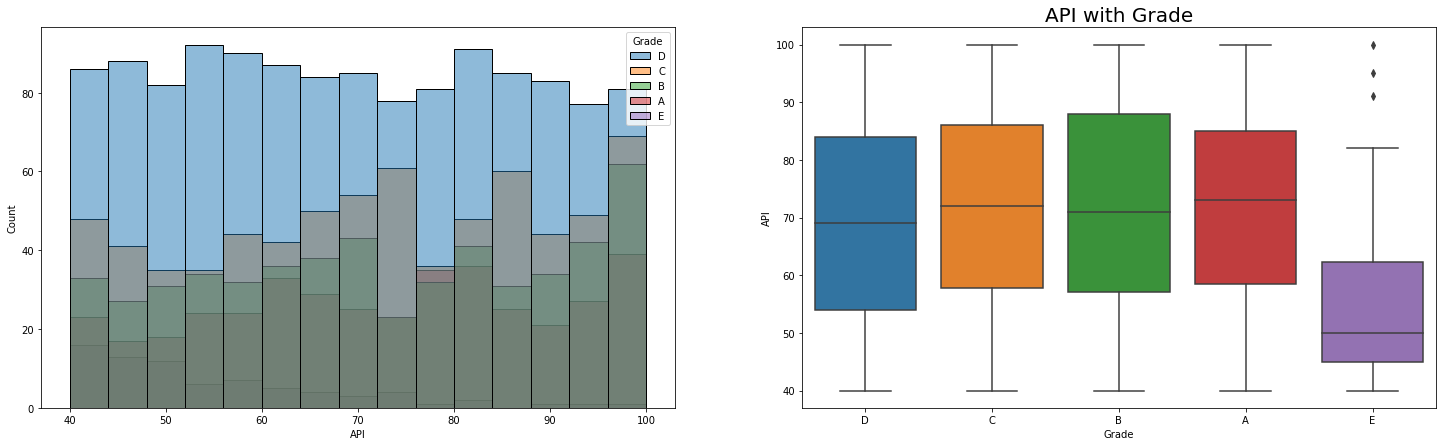

*****************************************************************************************************************************


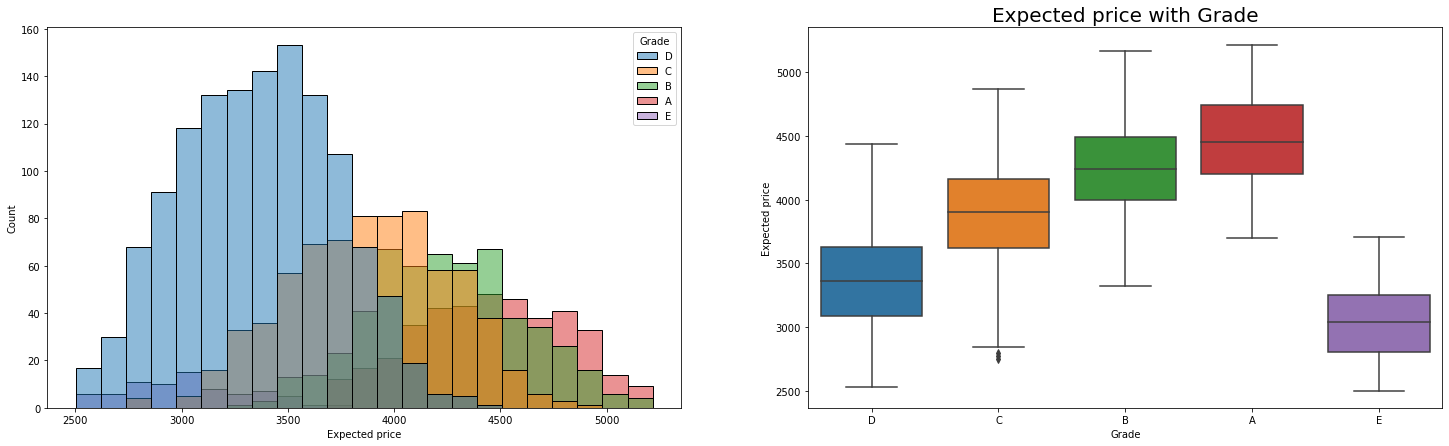

*****************************************************************************************************************************


In [10]:
for i in numerical:
    if i!='Id':
        fig, ax = plt.subplots(1, 2, figsize = (25, 7))
        sns.histplot(x = House_df[i], hue = House_df["Grade"], ax = ax[0])
        sns.boxplot(y = House_df[i], x = House_df["Grade"], ax = ax[1])
        plt.title(f'{i} with Grade',fontsize=20)
        plt.show()
        print('*****************************************************************************************************************************')

# $ Observations $

##### 1. A grade houses have highest  Prices
##### 2. E grade houses have lowest APi
##### 3. E grade houses have the Lowest area as per Total,Bathrooms,Lawns

###  

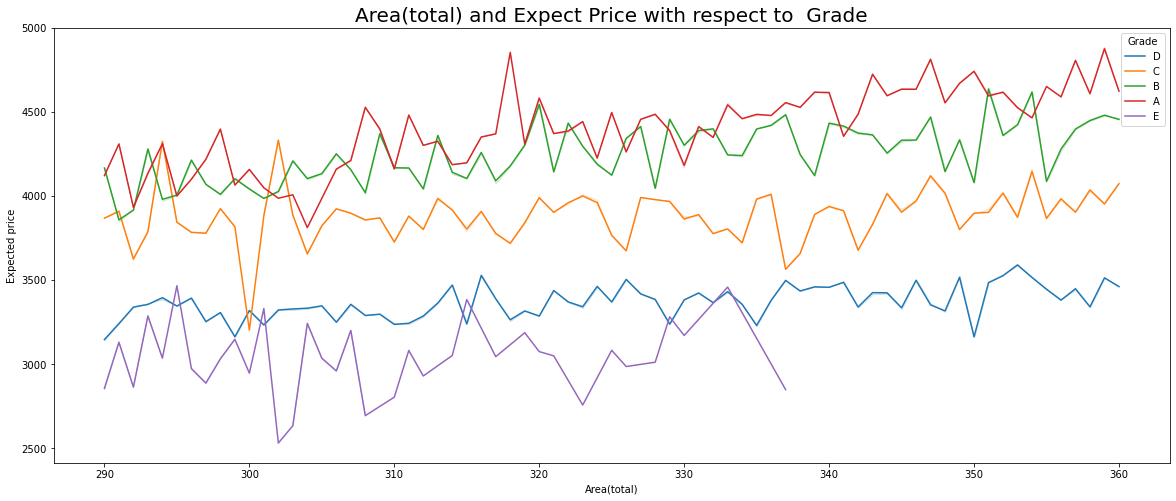

*****************************************************************************************************************************


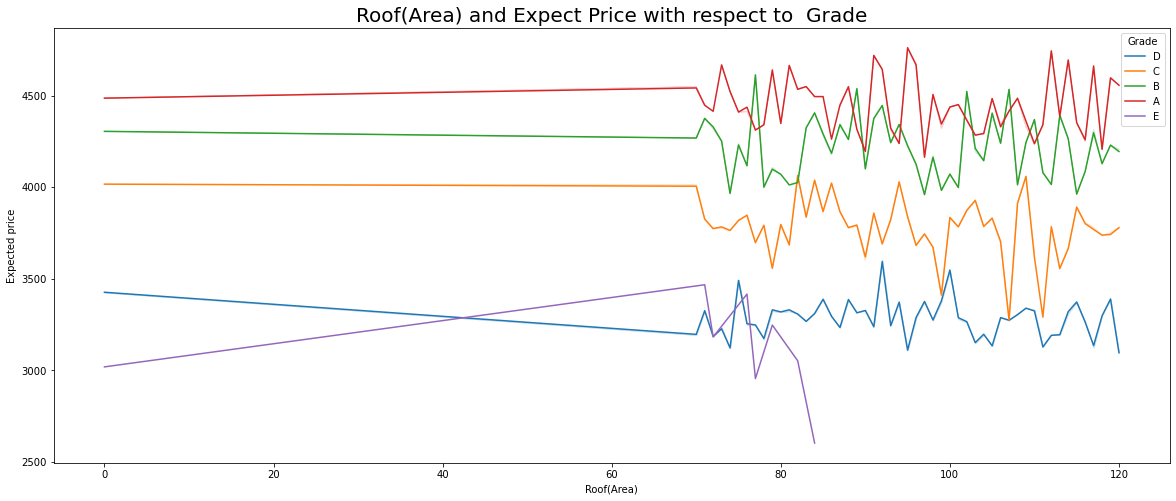

*****************************************************************************************************************************


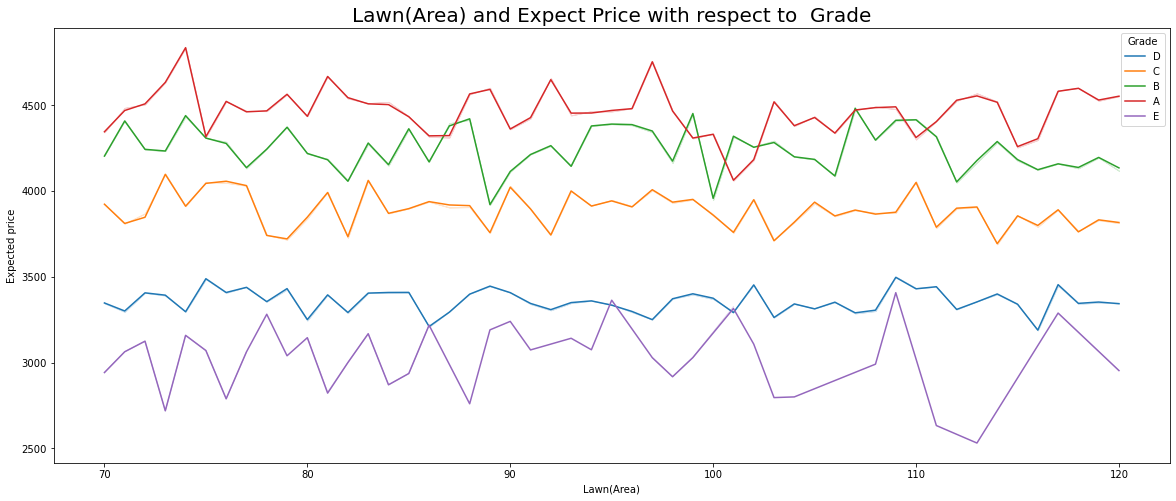

*****************************************************************************************************************************


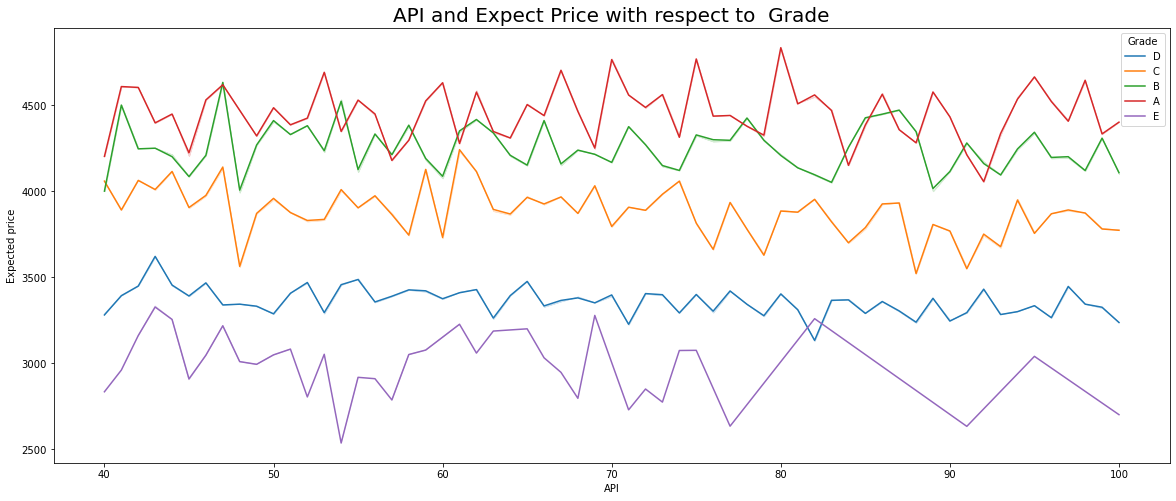

*****************************************************************************************************************************


In [11]:
for i in numerical:
    if i!='Id' and i!='Expected price':
        plt.figure(figsize=(20,8))
        sns.lineplot(data=House_df,x=i,y='Expected price',hue='Grade',ci=False)
        plt.title(f'{i} and Expect Price with respect to  Grade',fontsize=20)
        plt.show()
        print('*****************************************************************************************************************************')

### A grade houses have highest expected prices and E grade houses have lowest expected prices in terms of Total area , loan area and roof area

### 

# $$ Data Preprocessing $$

In [12]:
House_df.drop('Id',axis=1,inplace=True)

##### Here I dropped the column because it is not important for our analysis

#  

## $ Feature Engineering $

### My data contains some categorical features and we have to convert them in numeric form

### Label Encoding

In [13]:
Label=LabelEncoder()
House_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [14]:
House_df['roof']=Label.fit_transform(House_df['roof'])

House_df['Grade']=Label.fit_transform(House_df['Grade'])

In [15]:
House_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3


##### Here we convert all the categorical values to numerical values

### Here we can see that different features have different scaling and to avoid the biasness in the model towards a feature having high scale values we do the feature scaling of our data

#  

## $ Feature Scaling $

#### We used StandardScaler to push the mean of feature towards 0 and SD is 1 i.e. our all features are on same scale

In [16]:
scale=StandardScaler()

##  

In [17]:
df_=scale.fit_transform(House_df)
scaled=pd.DataFrame(df_,columns=House_df.columns)

### Correlation Metrix

<AxesSubplot:>

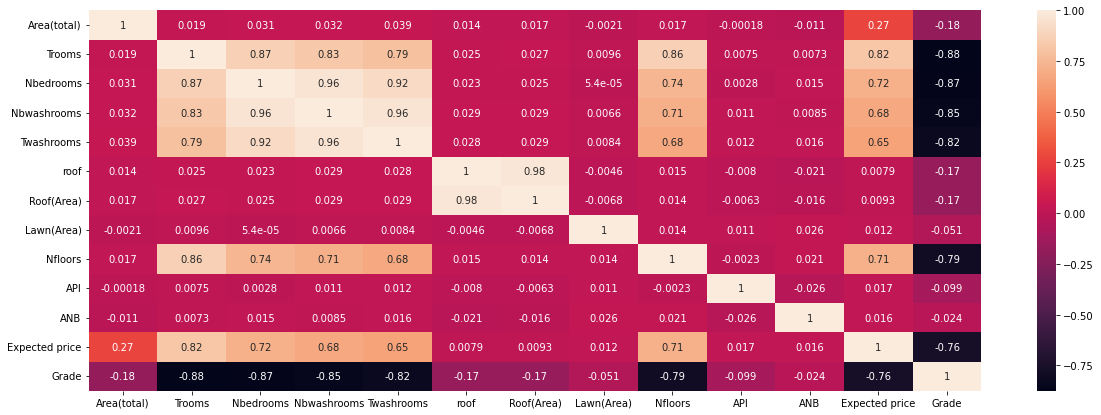

In [18]:
plt.figure(figsize=(20,7))
sns.heatmap(House_df.corr(),annot=True)

##### Because Lawn Area , API and ANB is less correlated with Grade so for further analysis we gonna drop them

## $ Feature Selection $

In [19]:
df=scaled.drop(['Lawn(Area)','API','ANB'],axis=1)

#  

###  Splitting the data into Training and Testing

#### Independent Features

In [20]:
X=df.drop(['Grade'],axis=1)

#### Dependent Feature

In [21]:
y=House_df['Grade']

#### Splitting

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# $$ Model Making $$

# --------------------------------------------------------------------------------------------------------------

## $$ Naive Bayes  $$

## Train the model

In [24]:
Gauss=GaussianNB()
Gauss.fit(X_train,y_train)

GaussianNB()

## Prediction

In [25]:
Gauss_prediction=Gauss.predict(X_test)
Gauss_prediction

array([2, 2, 3, 1, 0, 2, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 2,
       1, 0, 2, 1, 3, 3, 2, 0, 2, 0, 0, 0, 2, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 3, 1, 1, 1, 0, 4, 3, 2, 1, 2, 3, 1, 3, 2, 3, 0, 1, 2, 2, 2,
       1, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 2, 1, 3, 1, 3, 3, 2, 4, 3, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 3, 2, 1, 0, 3, 4, 2, 3, 3, 1, 3, 2, 3, 3, 2, 3,
       2, 3, 1, 2, 3, 2, 3, 1, 0, 0, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 2, 3, 3, 1, 3, 3, 4, 3, 0, 3, 3, 3, 2, 3, 1, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 2, 1, 2, 3, 3, 0, 1, 3, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 3, 2, 2, 3, 1, 4, 4, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 2, 2, 3, 0, 4, 3, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2,
       3, 3, 0, 1, 2, 0, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 4, 2, 3,
       0, 0, 4, 3, 3, 3, 2, 4, 3, 3, 3, 2, 3, 3, 0,

### Evaluation

In [26]:
acc=metrics.accuracy_score(Gauss_prediction,y_test)
print('\nAccuracy for NAive Bayes model is ',(round(acc,4))*100,'%')
print('\n')


Accuracy for NAive Bayes model is  80.33 %




### Classification Report

In [27]:
print(classification_report(Gauss_prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        83
           1       0.83      0.70      0.76       126
           2       0.67      0.69      0.68       122
           3       0.84      0.93      0.88       246
           4       0.70      0.30      0.42        23

    accuracy                           0.80       600
   macro avg       0.78      0.70      0.73       600
weighted avg       0.80      0.80      0.80       600



In [28]:
a=permutation_importance(Gauss,X_test,y_test).importances_mean
b=X_test.columns
pd.DataFrame(a,b,columns=['Correlation']).sort_values(by='Correlation',ascending=False)

,Correlation
Trooms,0.181667
Nbedrooms,0.107000
Nbwashrooms,0.067667
Twashrooms,0.038333
Nfloors,0.028333
Expected price,0.020000
Area(total),0.012333
Roof(Area),0.006333
roof,0.000000


## ROC_AUC score

In [29]:
y_score=Gauss.predict_proba(X_test)
roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
print('\nAUC Score for  Naive Bayes model is ',(round(roc_score,4))*100,'%')
print('\n')


AUC Score for  Naive Bayes model is  96.61 %




## ---------------------------------------------------------------------------------------------------------------------------

## $$  KNN Model $$

### Making Model

In [30]:
knn=KNeighborsClassifier()

### Choosing best K

In [31]:
k_values = list(range(1,30))
param_grid = {'n_neighbors': k_values}

In [32]:
full_cv_classifier = GridSearchCV(knn,param_grid,cv=5,scoring='neg_mean_squared_error')

In [33]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [34]:
full_cv_classifier.best_params_

{'n_neighbors': 15}

### Define and Train the model

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=15)

In [36]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

### Prediction

In [37]:
KNN_Predict=knn_model.predict(X_test)
KNN_Predict

array([2, 2, 3, 2, 0, 1, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 0, 0, 3, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 2, 3, 3, 2,
       1, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3,
       2, 3, 1, 2, 3, 2, 3, 0, 1, 0, 3, 3, 2, 1, 2, 3, 2, 2, 1, 1, 2, 2,
       2, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 2, 1, 2, 3, 3, 0, 1, 3, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 1, 4, 4, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 1, 3, 0, 3, 1, 1,
       3, 3, 0, 2, 2, 0, 2, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3,
       0, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,

### Evaluation

In [38]:
acc=metrics.accuracy_score(KNN_Predict,y_test)
print('\nAccuracy for KNN model is ',(round(acc,4))*100,'%')
print('\n')


Accuracy for KNN model is  88.33 %




### Classification Report

In [39]:
print(classification_report(KNN_Predict,y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        79
           1       0.86      0.81      0.83       112
           2       0.82      0.84      0.83       122
           3       0.95      0.93      0.94       278
           4       0.40      0.44      0.42         9

    accuracy                           0.88       600
   macro avg       0.78      0.79      0.78       600
weighted avg       0.89      0.88      0.88       600



In [40]:
a=permutation_importance(knn_model,X_test,y_test).importances_mean
b=X_test.columns
pd.DataFrame(a,b,columns=['Correlation']).sort_values(by='Correlation',ascending=False)

,Correlation
Trooms,0.189000
Nbedrooms,0.128000
Nfloors,0.122667
Twashrooms,0.096667
Nbwashrooms,0.095000
Area(total),0.066333
Expected price,0.051000
roof,0.039000
Roof(Area),0.018667


# ROC_AUC score

In [41]:
y_score=knn_model.predict_proba(X_test)
roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
print('\nAUC Score for KNN  model is ',(round(roc_score,4))*100,'%')
print('\n')


AUC Score for KNN  model is  98.59 %




###  -------------------------------------------------------------------------------------------------------------------------------------------------------------

## $$ DecisionTree $$

In [42]:
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_leaf= [5, 10, 20, 50, 100,200]
cv=KFold(n_splits=10)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= cv,
    scoring="accuracy")
    print(f'\nFor max depth: {val}')
    print('\naccuracy is ',np.mean(score))


For max depth: 1

accuracy is  0.5813333333333334

For max depth: 2

accuracy is  0.6993333333333334

For max depth: 3

accuracy is  0.7506666666666667

For max depth: 4

accuracy is  0.7693333333333334

For max depth: 5

accuracy is  0.806

For max depth: 6

accuracy is  0.8253333333333334

For max depth: 7

accuracy is  0.8343333333333334

For max depth: 8

accuracy is  0.8336666666666666

For max depth: 9

accuracy is  0.8376666666666666

For max depth: 10

accuracy is  0.835


In [43]:
for val in min_samples_leaf:
    score = cross_val_score(tree.DecisionTreeClassifier(min_samples_leaf= val, random_state= 42), X, y, cv= cv,
    scoring="accuracy")
    print(f'\nFor min_samples_leaf: {val}')
    print('\naccuracy is ',np.mean(score))


For min_samples_leaf: 5

accuracy is  0.8323333333333334

For min_samples_leaf: 10

accuracy is  0.845

For min_samples_leaf: 20

accuracy is  0.8443333333333334

For min_samples_leaf: 50

accuracy is  0.8063333333333332

For min_samples_leaf: 100

accuracy is  0.7896666666666666

For min_samples_leaf: 200

accuracy is  0.7626666666666667


## Making Model

In [44]:
Decision=DecisionTreeClassifier(max_depth=9,min_samples_leaf=100)

### Train the Model

In [45]:
Decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

### Prediction

In [46]:
Decision_predict=Decision.predict(X_test)
Decision_predict

array([2, 2, 3, 2, 0, 2, 2, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 3,
       1, 0, 2, 1, 3, 3, 2, 0, 3, 0, 0, 0, 2, 3, 3, 1, 3, 2, 3, 2, 1, 2,
       3, 2, 2, 1, 1, 1, 0, 3, 3, 2, 1, 2, 3, 2, 3, 2, 3, 0, 1, 3, 3, 2,
       2, 3, 1, 3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 1, 3, 1, 3, 2, 2, 3, 3, 0, 0, 3, 0, 1, 1, 2, 3, 3, 3, 3, 2,
       0, 2, 3, 1, 2, 0, 3, 2, 1, 0, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 2, 3,
       2, 2, 1, 2, 3, 2, 3, 1, 0, 0, 3, 3, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 3, 1, 3, 2, 2, 0, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 2, 3, 3, 2, 3, 0, 2, 3, 3, 1, 2, 3, 3, 0, 2, 3, 0, 1,
       3, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 2, 2, 3, 0, 3, 3, 3, 3, 2, 2, 3,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 0, 3, 3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 2,
       3, 3, 0, 2, 2, 0, 2, 0, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3,
       0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0,

### Evaluation

In [47]:
acc=metrics.accuracy_score(Decision_predict,y_test)
print('\nAccuracy for Decision model is ',(round(acc,4))*100,'%')
print('\n')


Accuracy for Decision model is  80.33 %




### Classification Report

In [48]:
print(classification_report(Decision_predict,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        92
           1       0.57      0.73      0.64        82
           2       0.78      0.66      0.71       148
           3       0.92      0.90      0.91       278
           4       0.00      0.00      0.00         0

    accuracy                           0.80       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.83      0.80      0.81       600



In [49]:
a=permutation_importance(Decision,X_test,y_test).importances_mean
b=X_test.columns
pd.DataFrame(a,b,columns=['Correlation']).sort_values(by='Correlation',ascending=False)

,Correlation
Trooms,0.419333
Nbedrooms,0.159333
Area(total),0.026000
Nbwashrooms,0.024667
Twashrooms,0.010000
roof,0.000000
Roof(Area),0.000000
Nfloors,0.000000
Expected price,0.000000


## ROC_AUC score

In [50]:
y_score=Decision.predict_proba(X_test)
roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
print('\nAUC Score for Decision Tree model is ',(round(roc_score,4))*100,'%')
print('\n')


AUC Score for Decision Tree model is  95.28999999999999 %




##  ----------------------------------------------------------------------------------------------------------------------------

## $$ RandomForest $$

### Hyperparameter Tuning

In [51]:
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_leaf= [5, 10, 20, 50, 100,200]
cv=KFold(n_splits=10)
for val in max_depth:
    score = cross_val_score(RandomForestClassifier(max_depth= val, random_state= 42), X, y, cv= cv,
    scoring="accuracy")
    print(f'\nFor max depth: {val}')
    print('\naccuracy is ',np.mean(score))


For max depth: 1

accuracy is  0.5976666666666667

For max depth: 2

accuracy is  0.7723333333333333

For max depth: 3

accuracy is  0.7979999999999999

For max depth: 4

accuracy is  0.8183333333333334

For max depth: 5

accuracy is  0.8393333333333335

For max depth: 6

accuracy is  0.8640000000000001

For max depth: 7

accuracy is  0.8706666666666667

For max depth: 8

accuracy is  0.8766666666666667

For max depth: 9

accuracy is  0.8793333333333333

For max depth: 10

accuracy is  0.877


In [52]:
for val in min_samples_leaf:
    score = cross_val_score(RandomForestClassifier(min_samples_leaf= val, random_state= 42), X, y, cv= cv,
    scoring="accuracy")
    print(f'\nFor min_samples_leaf: {val}')
    print('\naccuracy is ',np.mean(score))


For min_samples_leaf: 5

accuracy is  0.8766666666666667

For min_samples_leaf: 10

accuracy is  0.8709999999999999

For min_samples_leaf: 20

accuracy is  0.859

For min_samples_leaf: 50

accuracy is  0.8383333333333333

For min_samples_leaf: 100

accuracy is  0.8163333333333334

For min_samples_leaf: 200

accuracy is  0.7679999999999999


### Making the Model

In [53]:
Random=RandomForestClassifier(max_depth=9,min_samples_leaf=5)

### Train the model

In [54]:
Random.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=5)

### Prediction

In [55]:
Random_Predict=Random.predict(X_test)
Random_Predict

array([2, 2, 3, 2, 0, 1, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 2,
       2, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 1, 3, 2, 3, 0, 2, 3, 2, 2,
       1, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 1, 3, 1, 3, 2, 2, 3, 3, 0, 0, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3,
       2, 3, 1, 2, 3, 2, 3, 1, 1, 0, 3, 3, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 3, 1, 2, 3, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 1, 3, 4, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 0, 3, 0, 3, 1, 1,
       3, 3, 0, 2, 2, 0, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3,
       0, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,

### Evaluation

In [56]:
acc=metrics.accuracy_score(Random_Predict,y_test)
print('\nAccuracy for Random Forest model is ',(round(acc,4))*100,'%')
print('\n')


Accuracy for Random Forest model is  89.17 %




### Classification Report

In [57]:
print(classification_report(Random_Predict,y_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        76
           1       0.84      0.80      0.82       111
           2       0.88      0.83      0.86       132
           3       0.96      0.95      0.95       276
           4       0.30      0.60      0.40         5

    accuracy                           0.89       600
   macro avg       0.76      0.83      0.78       600
weighted avg       0.90      0.89      0.89       600



In [58]:
a=permutation_importance(Random,X_test,y_test).importances_mean
b=X_test.columns
pd.DataFrame(a,b,columns=['Correlation']).sort_values(by='Correlation',ascending=False)

,Correlation
Trooms,0.217333
Nbedrooms,0.085333
Area(total),0.071667
Nbwashrooms,0.025667
Roof(Area),0.025000
roof,0.012333
Nfloors,0.011000
Expected price,0.007333
Twashrooms,0.004333


## ROC_AUC score

In [59]:
y_score=Random.predict_proba(X_test)
roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
print('\nAUC Score for Random Forest  model is ',(round(roc_score,4))*100,'%')
print('\n')


AUC Score for Random Forest  model is  98.46000000000001 %




###  ------------------------------------------------------------------------------------------------------------------------------------------------------

## $$ Logistic Regression $$

## Model Making

In [60]:
Logistic=LogisticRegression()

### Training of Model

In [61]:
Logistic.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [62]:
Logistic_Prediction=Logistic.predict(X_test)
Logistic_Prediction

array([2, 2, 3, 2, 0, 1, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 0, 2, 1, 2, 3, 2, 1, 3, 1, 0, 0, 3, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 1, 3, 2, 3, 0, 2, 3, 2, 2,
       1, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 1, 3, 2, 3, 3, 3, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 3, 3, 2, 3, 0, 3, 3, 2, 3, 2, 3,
       2, 2, 1, 2, 3, 2, 3, 0, 1, 0, 3, 3, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 2, 3, 3, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 1, 3, 3, 2, 3, 0, 3, 2, 3, 1, 2, 3, 3, 0, 1, 3, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 2, 2, 3, 1, 3, 4, 3, 3, 2, 1, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 1, 3, 0, 3, 1, 1,
       3, 3, 0, 2, 2, 0, 2, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3,
       0, 0, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,

### Evaluation

In [63]:
acc=metrics.accuracy_score(Logistic_Prediction,y_test)
print('\nAccuracy for Logistic Regression model is ',(round(acc,5))*100,'%')
print('\n')


Accuracy for Logistic Regression model is  90.5 %




## Classification Report

In [64]:
print(classification_report(Logistic_Prediction,y_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        79
           1       0.91      0.83      0.86       116
           2       0.87      0.87      0.87       126
           3       0.95      0.95      0.95       271
           4       0.40      0.50      0.44         8

    accuracy                           0.91       600
   macro avg       0.80      0.82      0.81       600
weighted avg       0.91      0.91      0.91       600



In [65]:
a=permutation_importance(Logistic,X_test,y_test).importances_mean
b=X_test.columns
pd.DataFrame(a,b,columns=['Correlation']).sort_values(by='Correlation',ascending=False)

,Correlation
Trooms,0.285333
Nbedrooms,0.174000
Nfloors,0.120667
Nbwashrooms,0.112000
Area(total),0.097333
Twashrooms,0.045000
Roof(Area),0.041000
Expected price,0.009333
roof,0.007333


### ROC_AUC Score

In [66]:
y_score=Logistic.predict_proba(X_test)
roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
print('\nAUC Score for Logistic Regression model is ',(round(roc_score,4))*100,'%')
print('\n')


AUC Score for Logistic Regression model is  98.9 %




# $$Comparision$$

In [71]:
Model=['Bayes','Bayes','KNN','KNN','Decision','Decision','Random','Random','Logistic','Logistic']
Score=[80.33,96.61,88.33,98.59,80.33,95.30,89.17,98.49,90.5,98.9]
type1=['Accuracy_score','AUC_score','Accuracy_score','AUC_score','Accuracy_score','AUC_score','Accuracy_score','AUC_score','Accuracy_score','AUC_score']
df=pd.DataFrame({"Models":Model,
                "Scores(%)":Score,
                "Types of scores":type1})

In [72]:
df.set_index('Models')

,Scores(%),Types of scores
Models,,
Bayes,80.33,Accuracy_score
Bayes,96.61,AUC_score
KNN,88.33,Accuracy_score
KNN,98.59,AUC_score
Decision,80.33,Accuracy_score
Decision,95.30,AUC_score
Random,89.17,Accuracy_score
Random,98.49,AUC_score
Logistic,90.50,Accuracy_score


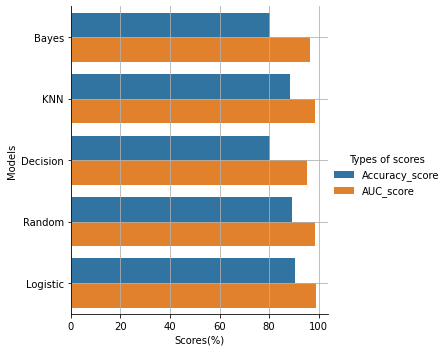

In [74]:
sns.catplot(data = df, y= 'Models', x= 'Scores(%)', kind = 'bar',hue = 'Types of scores', ci= None);
plt.grid()
plt.show()

## Logistic Regression Model is the best Model for our problem with highest acuracy_score and AUC_Score

#  

In [124]:
def func(Model=Gauss):
    Model.fit(X_train,y_train)
    Gauss_prediction=Model.predict(X_test)
    y_score=Model.predict_proba(X_test)
    roc_score=roc_auc_score(y_test,y_score,multi_class='ovr')
    acc=metrics.accuracy_score(Gauss_prediction,y_test)
    print('-------------------------------------------------------------------------------------')
    print('\n')
    print(f'\nAccuracy for {Model} model is ',(round(acc,5))*100,'%')
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print(f'\nAUC Score for  {Model} model is ',(round(roc_score,4))*100,'%')
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('Classification Report')
    print('\n')
    print(classification_report(Gauss_prediction,y_test))
    a=permutation_importance(Model,X_test,y_test).importances_mean
    b=X_test.columns
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('\n')
    print(pd.DataFrame(a,b,columns=['Model Correlation with target variable']).sort_values(by='Model Correlation with target variable',ascending=False))
    print('\n')

In [125]:
ipywidgets.interact(func,Model=[Gauss,Decision,knn_model,Random,Logistic])

interactive(children=(Dropdown(description='Model', options=(GaussianNB(), DecisionTreeClassifier(max_depth=9,…

<function __main__.func(Model=GaussianNB())>